In [ ]:
petra = web.get_data_yahoo( 'PETR4.SA', start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2022, 10, 26) )
petra

In [ ]:
petra['Close'].plot( figsize=(16,10) )

In [ ]:
petra_sa = petra.loc['2021-01':'2022-10'].copy()
petra_sa.tail()

In [ ]:
# Média Móvel dos ultimos 30 dias
petra_sa['MMS30'] = petra_sa['Close'].rolling( window=30 ).mean()
petra_sa.head(50)

petra_sa = petra_sa.drop('MMS30', axis=1)

In [ ]:
petra_sa = petra_sa.fillna(0)
petra_sa.head()

In [ ]:
fig1 = plt.figure(figsize= (14, 8))

ax1 = fig1.add_axes([0, 0, 1, 1])

ax1.plot( petra_sa['Close'], label='Petrobras')
ax1.plot( petra_sa['Close'].rolling( window=30 ).mean(), label='MMS30' )
ax1.plot( petra_sa['Close'].rolling( window=15 ).mean(), label='MMS15' )

plt.grid(False)
plt.legend()
plt.show()

In [ ]:
petra_sa['MME30'] = petra_sa['Close'].ewm( span=30 ).mean()
petra_sa['MME30']

In [ ]:
petra_sa = petra_sa.fillna(0)
petra_sa.head()

In [ ]:
petra_sa = petra_sa.drop('MME30', axis=1)
petra_sa.head(10)

In [ ]:
petra_sa

In [ ]:
fig2 = plt.figure(figsize= (14, 8))

ax2 = fig2.add_axes([0, 0, 1, 1])

ax2.plot( petra_sa['Close'], label='Petrobras', color='cyan')
ax2.plot( petra_sa['Close'].ewm( span=30 ).mean(), label='MME30', color='magenta' )
ax2.plot( petra_sa['Close'].ewm( span=15 ).mean(), label='MME15', color='orange')

plt.grid(False)
plt.legend()
plt.show()

In [ ]:
# Média Móvel Simples dos ultimos 30 dias
petra_sa['MMS30'] = petra_sa['Close'].rolling( window=30 ).mean()

# Média Móvel Exponencial dos ultimos 30 dias
petra_sa['MME30'] = petra_sa['Close'].ewm( span=30 ).mean()

petra_sa = petra_sa.fillna(0)

petra_sa.tail()

In [ ]:
petra_sa[['Close', 'MME30','MMS30']].plot( figsize=(16, 10) )

In [ ]:
petra_sa.isnull()

In [ ]:
petra_sa.info()

In [ ]:
petra_sa.dtypes

In [ ]:
petra_sa.tail()

In [ ]:
petra_sa.shape[::-1]

In [ ]:
petra_sa.shape

In [ ]:
petra_sa.tail(1)

In [ ]:
fig3 = plt.figure( figsize=(14, 8) )

ax3 = fig3.add_axes([0, 0, 1, 1])

ax3.plot( petra_sa['Close'], label='Petrobras', color='magenta' )
ax3.plot( petra_sa['MMS30'], label='Média Móvel Simp.', color='cyan' )
ax3.plot( petra_sa['MME30'], label='Média Móvel Expo.', color='orange' )


plt.grid(False)
plt.legend()
plt.show()

In [ ]:
petra_sa.isnull().sum()

In [ ]:
petra_sa.mean()

In [ ]:
petra_sa.count()

In [ ]:
petra_sa.median()

In [ ]:
# O quanto esses dados desvia em relação a média aritmética
petra_sa.std()

In [ ]:
petra_sa.describe()

In [ ]:
requisicao = requests.get('https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL')
requisicao = requisicao.json()
requisicao.keys()

In [ ]:
tipo_dados_fira_base = 'json'
url_fira_base = 'https://analisepython-2f507-default-rtdb.firebaseio.com'

In [ ]:
requisicao_fire_base = requests.get(f'{url_fira_base}/.{tipo_dados_fira_base}')

In [ ]:
dados_post_fira_base = '[2,{"Banco":"Alfa","Correntista":"Maria","LocalAgencia":"Avenida Coronel Tito, nº432","NroAgencia":9920,"NroConta":6222,"Tipo":"Conta Corrente"}]'

In [ ]:
requisicao_fire_base.text

In [ ]:
post_fira_base = requests.post('https://analisepython-2f507-default-rtdb.firebaseio.com/.json', data=dados_post_fira_base)

In [ ]:
print(post_fira_base)
print(post_fira_base.json())
post_fira_base.text

In [ ]:
editar_post = '{"Banco":"Bradesco","Correntista":"Maria","LocalAgencia":"Avenida Coronel Tito, nº432","NroAgencia":9920,"NroConta":6222,"Tipo":"Conta Corrente"}'

patch_fira_base = requests.patch('https://analisepython-2f507-default-rtdb.firebaseio.com/-NFRGS-hrAtHppzF8o7U.json', data=editar_post)

print(patch_fira_base)
print(patch_fira_base.json())

In [ ]:
dados_json = pd.read_json('https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json')
dados_json.describe()

In [ ]:
dados_csv   = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=csv'
pd_read_csv = pd.read_table(dados_csv, sep=';')
pd_read_csv.describe()

In [ ]:
dados_json.tail(20)

In [ ]:
selic = sgs.get({'selic':432}, start='2010-01-01')
display(selic.head())

In [ ]:
fig, ax = plt.subplots()
ax.plot( selic.index, selic['selic'] )
ax.yaxis.set_major_formatter


# Heart Disease Dataset

- age: The person's age in years
- sex: The person's sex (1: male - 0: female)
- cp: tipo de dor no peito (1: angina típica - 2: angina atípica - 3: dor não anginosa - 4: asymptomatic)
- trestbps: pressão arterial em repouso (mm Hg on )
- slope: a inclinação do segmento ST de exercício de pico (1: ascendente - 2: achatado, 3: descendo)
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


-https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
-https://deepchecks.com/what-is-data-cleaning/
-https://towardsdatascience.com/2-types-of-duplicate-features-in-machine-learning-2931de6c949b

-https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/#:~:text=Standard%20Scaler&text=Na%20documenta%C3%A7%C3%A3o%2C%20eles%20explicam,mais%20manej%C3%A1veis%20para%20nossos%20modelos
-https://acervolima.com/tecnicas-standardscaler-minmaxscaler-e-robustscaler-ml/
-https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ 

In [45]:
from datetime import date, datetime, timedelta
from bcb import currency
from bcb import sgs

import seaborn as sns
import pandas_datareader.data as web
import matplotlib.ticker as mtick
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import mplcyberpunk
import numpy as np
import requests

plt.style.use('cyberpunk')


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('heart.csv')
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Student    7 non-null      object
 1   English    7 non-null      int64 
 2   Chemistry  7 non-null      int64 
 3   Math       7 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 352.0+ bytes


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.loc[ ( df.duplicated() == True ) ].count()

age         723
sex         723
cp          723
trestbps    723
chol        723
fbs         723
restecg     723
thalach     723
exang       723
oldpeak     723
slope       723
ca          723
thal        723
target      723
dtype: int64

In [7]:
df.loc[ ( df.age > 60 ) & ( df.sex == 0 ) ].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
21,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
23,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
25,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0


In [8]:
hd = df.drop_duplicates()
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.loc[ ( df.duplicated() == False ) ].tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [10]:
hd.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [11]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot: >

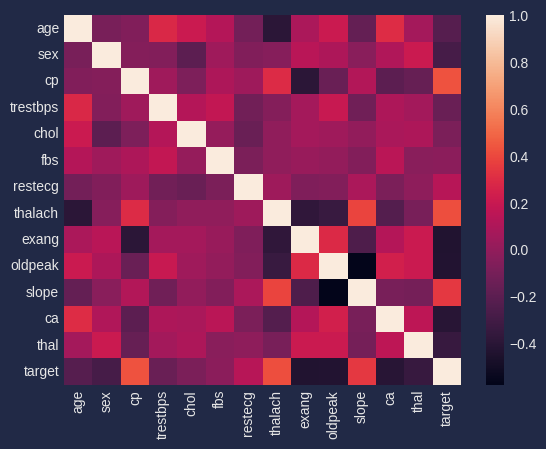

In [13]:
# df.loc[ (df.duplicated() == False) ].corr()
sns.heatmap( df.loc[ (df.duplicated() == False) ].corr(), annot=False )

<AxesSubplot: >

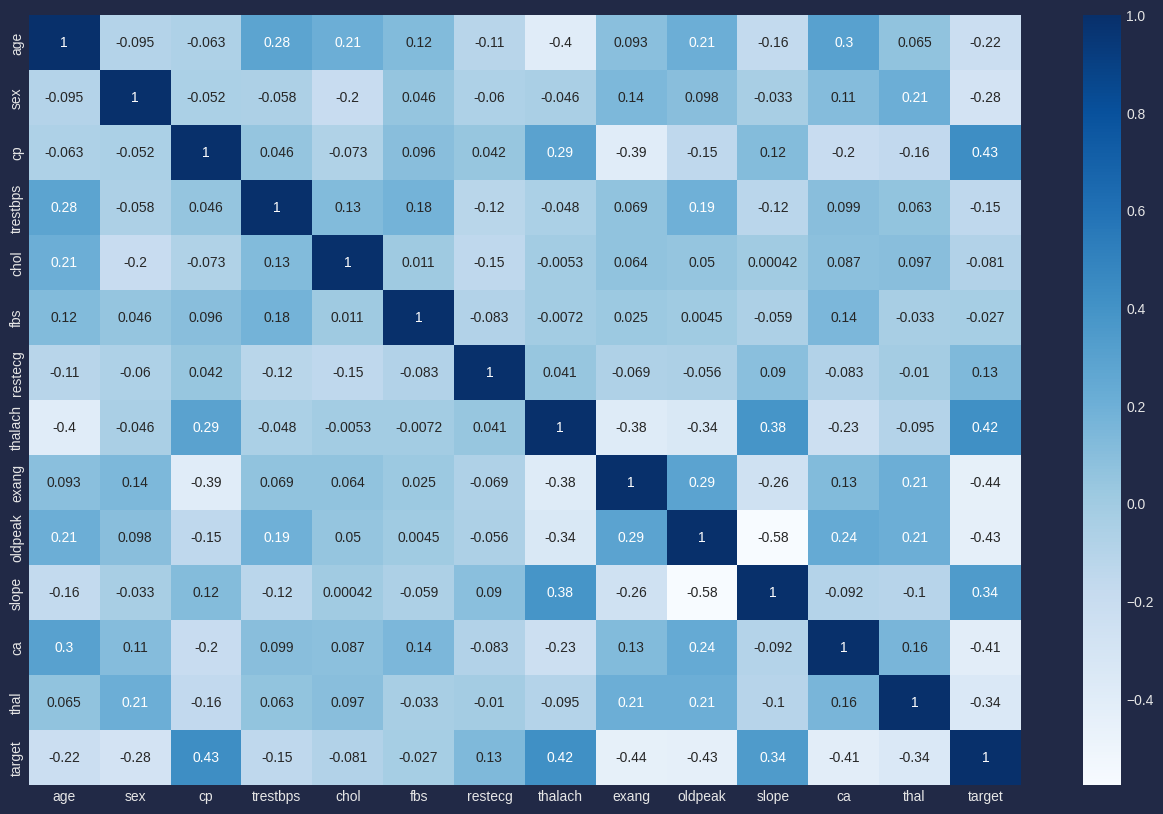

In [14]:
plt.figure( figsize=( 16, 10 ) )
sns.heatmap( df.loc[ (df.duplicated() == False) ].corr(), annot=True, cmap='Blues' )

In [15]:
hd['sex'].unique()

array([1, 0])

In [16]:
hd['sex'].nunique()

2

In [17]:
df.loc[ (df.duplicated() == False) ].head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


In [18]:
for cabecalhos in df.loc[ ( df.duplicated() == False ) ].columns:
    print(f'{cabecalhos}: { df.loc[( df.duplicated() == False )][cabecalhos].nunique() }')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [19]:
for cabecalhos in hd.columns:
    print(f'{cabecalhos}: { hd[cabecalhos].nunique() }')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [20]:
categoricas = [ 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' ]
numericas = [ 'age', 'trestbps','chol', 'thalach', 'oldpeak' ]

for i in categoricas:
    print(f'{i}: { df[i].nunique() }')
    print()
    for j in numericas:
        print(f'{j}: { df[j].nunique() }')
    break

sex: 2

age: 41
trestbps: 49
chol: 152
thalach: 91
oldpeak: 40


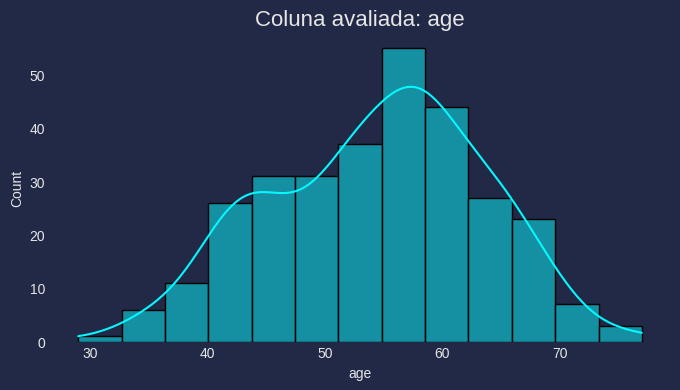

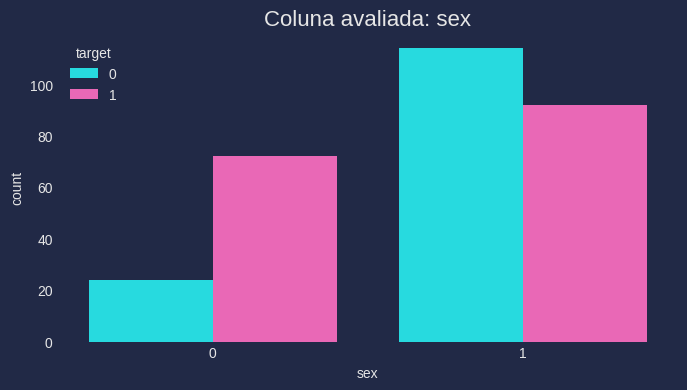

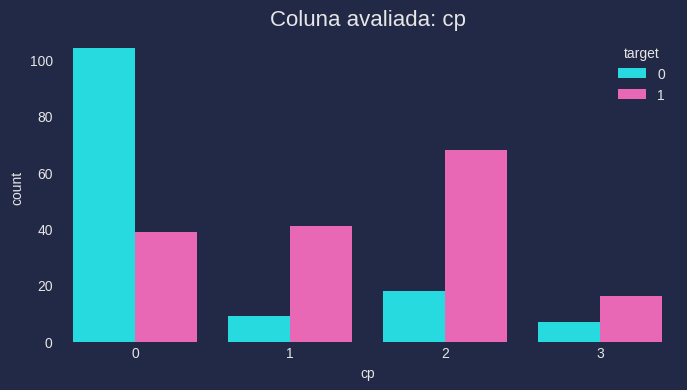

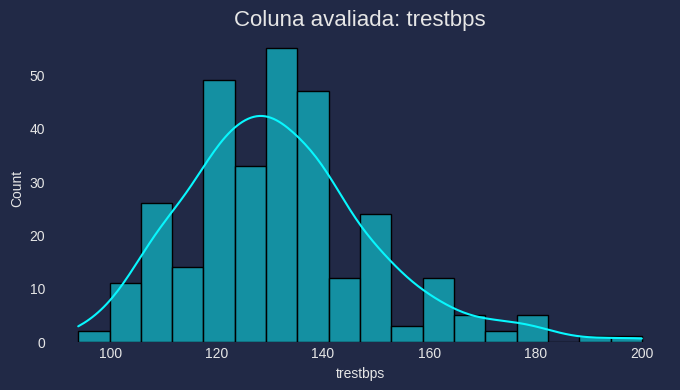

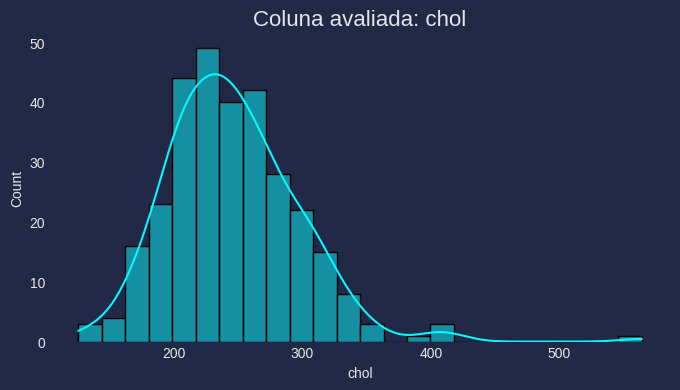

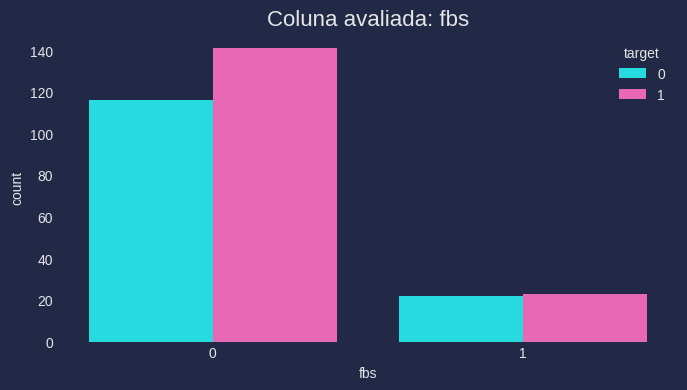

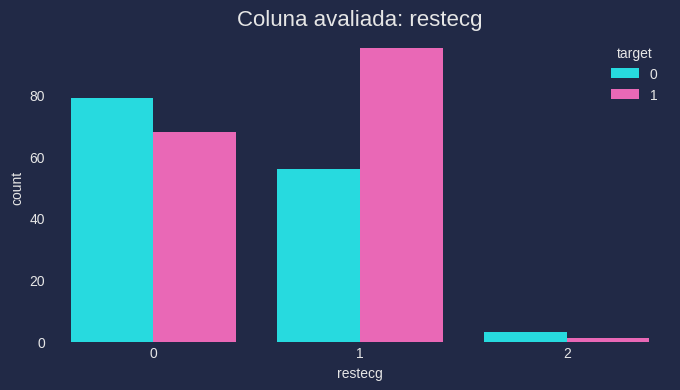

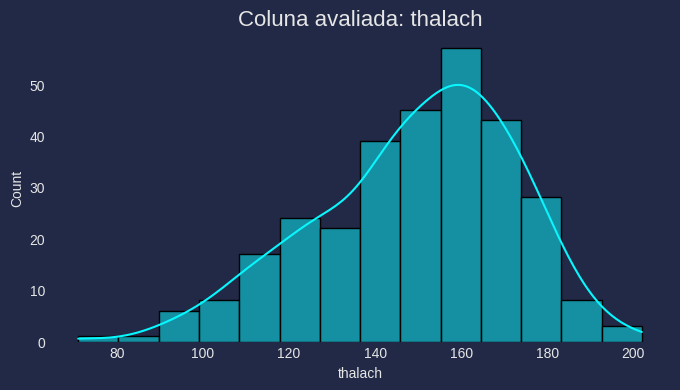

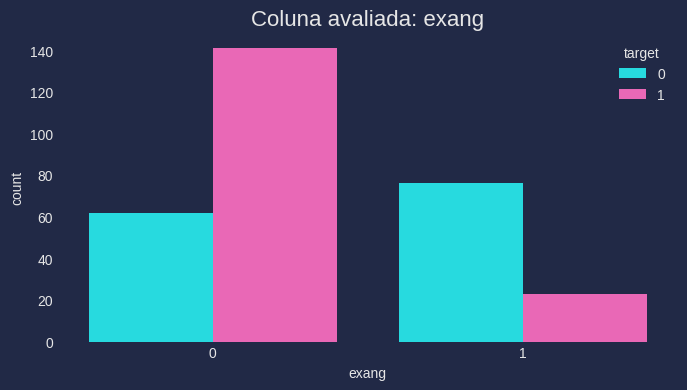

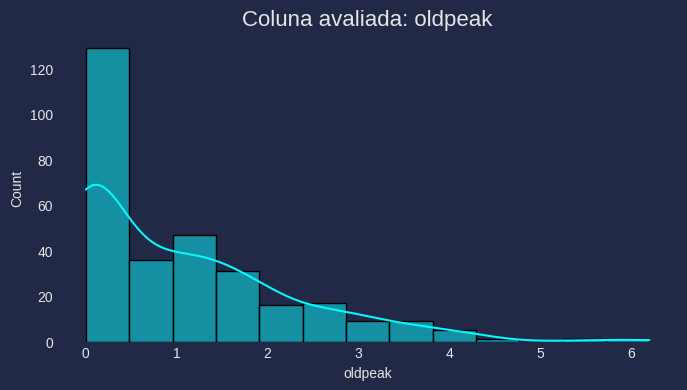

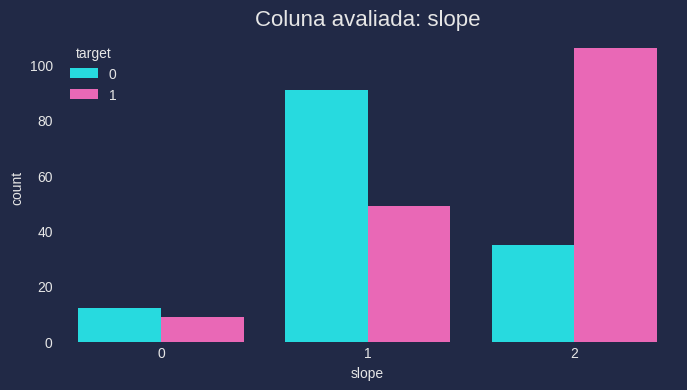

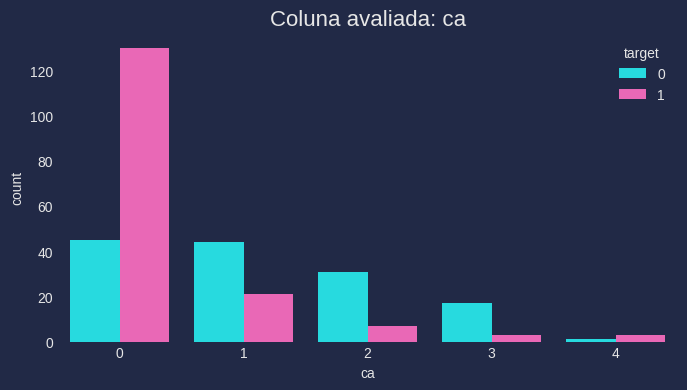

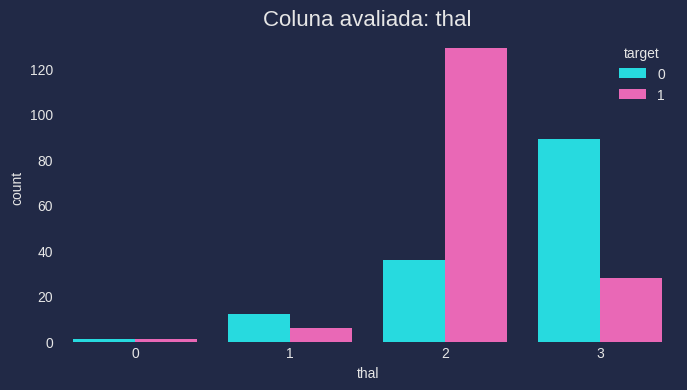

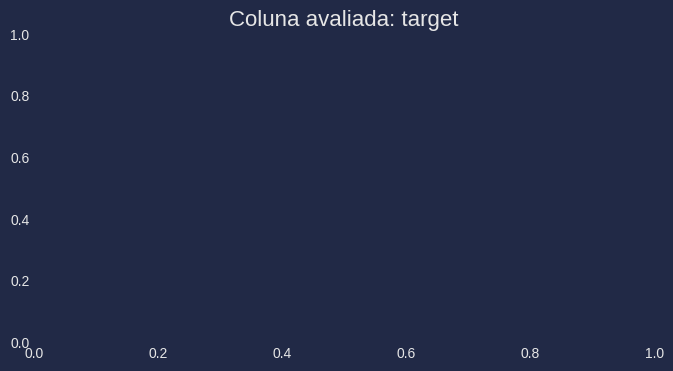

In [21]:
for c in hd.columns:

    ''' Para a lista numérica imprimir um Histplot, para a lista de categorias imprimir Countplot
        Tipo de dor no peito: 1= angina típica, 2= angina atípica, 3= dor não anginosa, 4= asimtomático
        target: Com problema do coração = 1,  Sem problema do coração = 0
        Sex: Homem = 1,  Mulher = 0
    '''

    plt.figure( figsize=(8, 4) )
    plt.title( f'Coluna avaliada: {c}' , fontsize=16 )
    plt.grid(False)
    
    if c in categoricas:
        sns.countplot( x=hd[c] , hue=hd['target'] )    
    
    if c in numericas:
        sns.histplot( x=hd[c] , kde=True )


# Removendo Outliers

<AxesSubplot: >

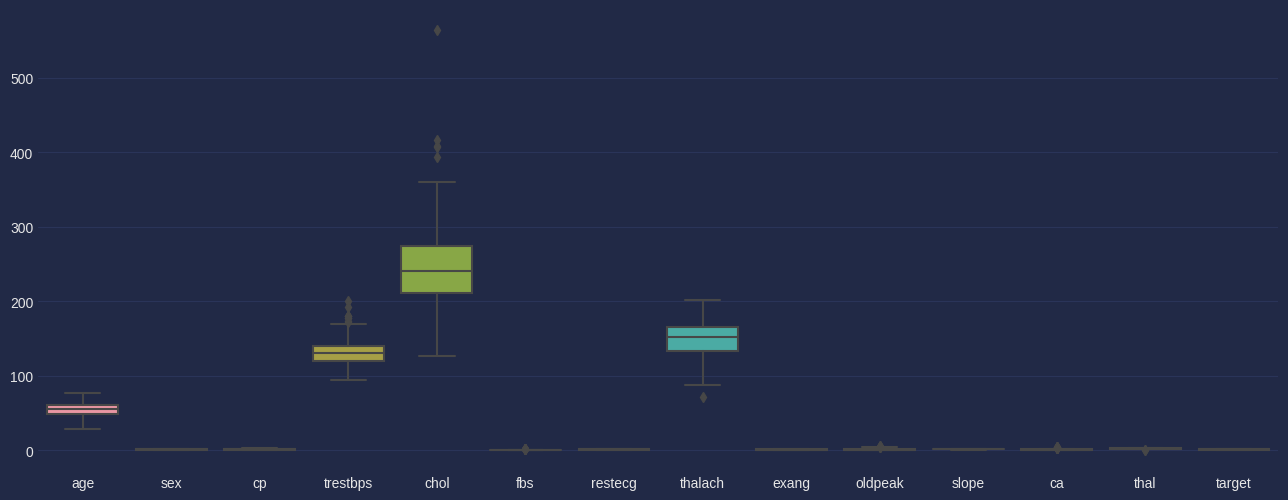

In [22]:
plt.figure( figsize=(16, 6) )
sns.boxplot( data=hd )

In [23]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
hd['trestbps'].quantile(0.75)

140.0

In [25]:
hd1 = hd[ hd['trestbps'] < hd['trestbps'].quantile(0.75) ]
hd1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


<AxesSubplot: >

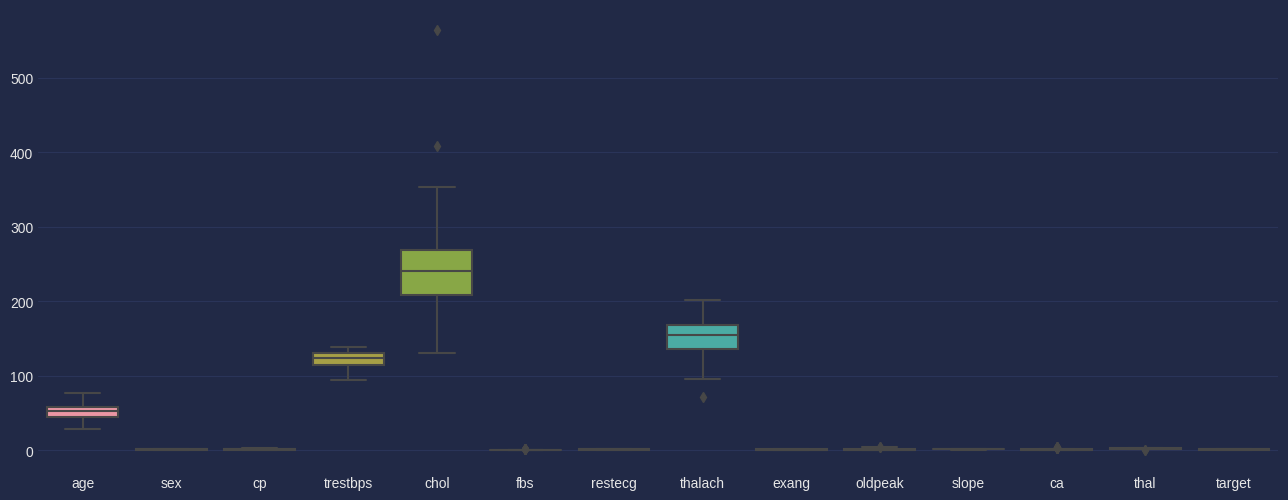

In [26]:
plt.figure( figsize=(16, 6) )
sns.boxplot( data=hd1 )

In [27]:
hd1['chol'].quantile(0.99)

353.96000000000004

In [28]:
hd2 = hd1[ hd1['chol'] < hd1['chol'].quantile(0.99) ]
hd2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0


<AxesSubplot: >

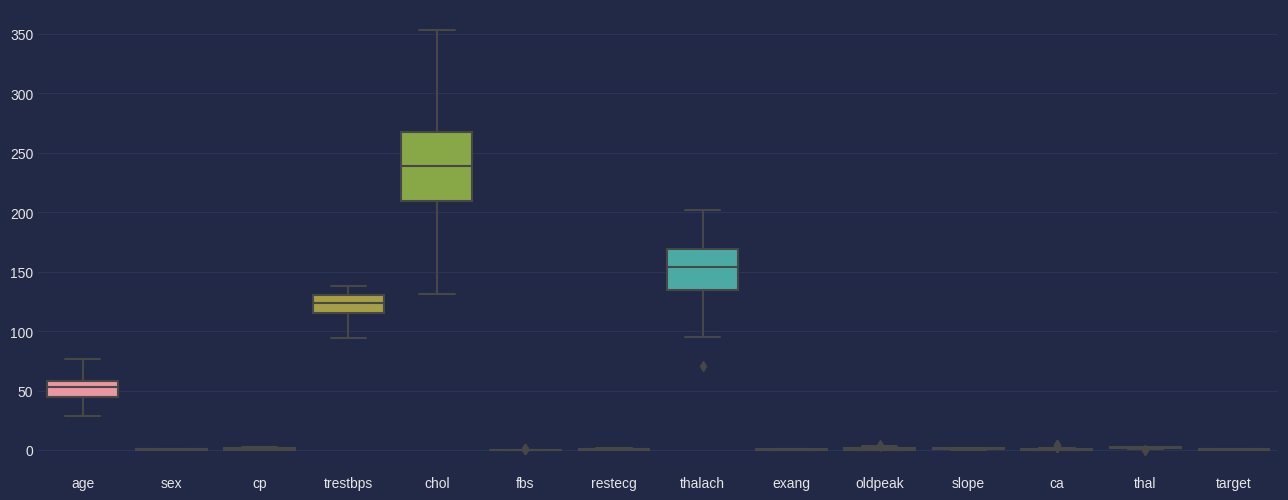

In [29]:
plt.figure( figsize=(16, 6) )
sns.boxplot( data=hd2 )

In [30]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,52.440594,0.698020,0.930693,122.227723,241.103960,0.133663,0.554455,150.440594,0.301980,0.874752,1.435644,0.683168,2.267327,0.584158
std,9.023404,0.460257,0.969766,10.085092,44.132817,0.341136,0.517846,23.292194,0.460257,1.014721,0.588714,0.996818,0.596692,0.494091
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,0.000000,0.000000,115.500000,209.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,53.000000,1.000000,1.000000,124.000000,239.000000,0.000000,1.000000,154.000000,0.000000,0.500000,1.000000,0.000000,2.000000,1.000000
75%,58.000000,1.000000,2.000000,130.000000,267.000000,0.000000,1.000000,168.750000,1.000000,1.475000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,138.000000,353.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [31]:
hd2['thalach'].quantile(0.01)

96.0

In [32]:
hd3 = hd2[ hd2['thalach'] > hd2['thalach'].quantile(0.01) ]
hd3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0


<AxesSubplot: >

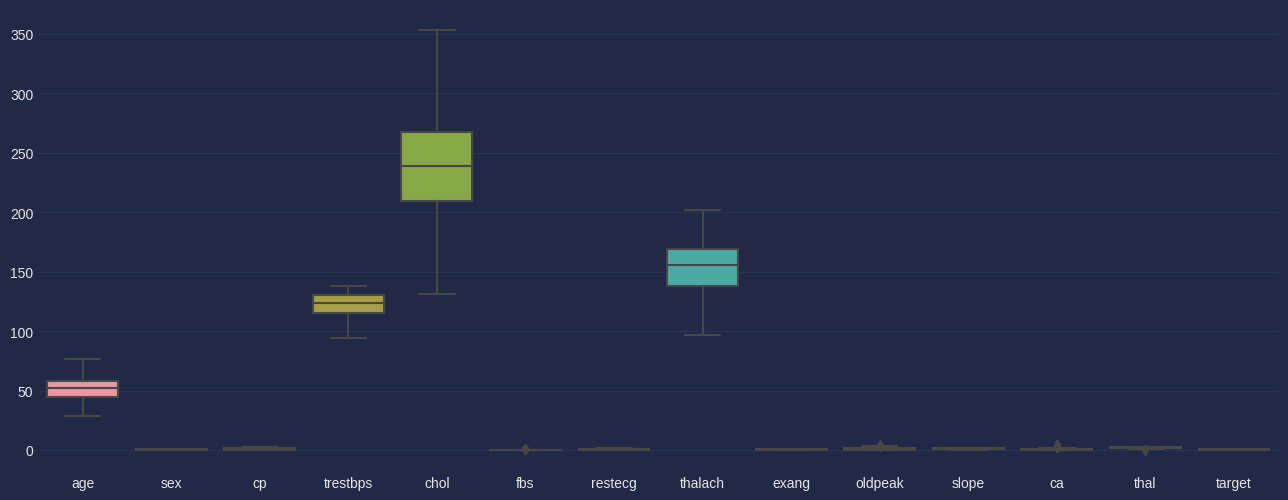

In [33]:
plt.figure( figsize=(16, 6) )
sns.boxplot( data=hd3 )

In [34]:
print(categoricas)
print(numericas)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [35]:
df = pd.DataFrame.from_dict({
    'Student': ['Nik', 'Kate', 'Kevin', 'Evan', 'Jane', 'Kyra', 'Melissa'],
    'English': [90, 95, 75, 93, 60, 85, 75],
    'Chemistry': [95, 95, 75, 65, 50, 85, 100],
    'Math': [100, 95, 50, 75, 90, 50, 80]
})

In [36]:
print(df.head())

  Student  English  Chemistry  Math
0     Nik       90         95   100
1    Kate       95         95    95
2   Kevin       75         75    50
3    Evan       93         65    75
4    Jane       60         50    90


In [37]:
df.quantile (                   
    q=0.5,
    axis=0,          
    numeric_only=True,      
    interpolation='linear' 

    # q=[0.5]: um float ou um array que fornece o(s) valor(es) dos quantis para calcular
    # axis=[0]: o eixo para calcular os percentis (0 para linha e 1 para coluna)
    # numeric_only=[True]: é definido como False, calcule os valores para as colunas datetime e timedelta também
    # interpolation=['linear']: se existem quantis entre dois valores, como interpolar os valores
)

English      85.0
Chemistry    85.0
Math         80.0
Name: 0.5, dtype: float64

In [38]:
'''
Nesta seção, você aprenderá a calcular um único percentil em uma coluna do Pandas Dataframe usando o método quantil.
Podemos simplesmente aplicar o método a uma determinada coluna e o percentil é retornado. Vamos ver como é isso:
Gere um único percentil com df.quantile()
'''
print(  f'percentil padrão, 50º: {df.English.quantile()}' )

percentil padrão, 50º: 85.0


In [39]:
'''
    Por padrão, o Pandas usará um parâmetro de q=0.5, que gerará o 50º percentil.
    Se quisermos, digamos, calcular um percentil 90, podemos passar um valor de q=0.9 para parâmetros:
    Gere um único percentil com df.quantile()
'''

print(  f'English: percentil padrão, 50º: {df.English.quantile(q=0.5)}' )
print(  f'English: percentil padrão, 90º: {df.English.quantile(q=0.9)}' )

English: percentil padrão, 50º: 85.0
English: percentil padrão, 90º: 93.8


In [40]:
hd4 = pd.get_dummies( data=hd3, columns=categoricas )
hd4.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,52.267677,122.257576,241.212121,151.671717,0.866162,0.590909,0.303030,0.696970,0.449495,0.212121,...,0.489899,0.590909,0.232323,0.101010,0.055556,0.020202,0.010101,0.050505,0.601010,0.338384
std,8.999947,10.183061,44.253027,21.778262,1.015472,0.492912,0.460733,0.460733,0.498704,0.409847,...,0.501165,0.492912,0.423385,0.302106,0.229642,0.141047,0.100248,0.219540,0.490932,0.474359
min,29.000000,94.000000,131.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,115.000000,209.000000,138.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.500000,124.000000,239.000000,155.500000,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,130.000000,267.000000,169.000000,1.400000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,138.000000,353.000000,202.000000,4.400000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
hd4['chol'].count(), hd4['chol'].mean(), hd4['chol'].std(), hd4['chol'].min(), hd4['chol'].quantile(q=0.75), hd4['chol'].max()

(198, 241.21212121212122, 44.253027136073364, 131, 267.0, 353)

In [42]:
X = hd4.drop('target', axis=1)
y = hd4['target']


In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42 )

In [ ]:
%pip install yfinance

In [2]:
import yfinance as yf

In [30]:
lmt = yf.Ticker('PETR4.SA')
lmt

yfinance.Ticker object <PETR4.SA>

In [31]:
lmt.info['fullTimeEmployees']

45532

In [37]:
hist = lmt.history( period=date.now() )
hist

NameError: name 'date' is not defined